In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from statsmodels.tsa.arima.model import ARIMA

In [5]:
from statsmodels.tsa.stattools import adfuller

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [68]:
TSales = pd.read_csv("Tractor-Sales AB.csv")

In [69]:
TSales.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [70]:
TSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [71]:
TSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Month-Year              144 non-null    object
 1   Number of Tractor Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [72]:
pd.to_datetime(TSales['Month-Year'], format = '%b-%y')

0     2003-01-01
1     2003-02-01
2     2003-03-01
3     2003-04-01
4     2003-05-01
         ...    
139   2014-08-01
140   2014-09-01
141   2014-10-01
142   2014-11-01
143   2014-12-01
Name: Month-Year, Length: 144, dtype: datetime64[ns]

In [73]:
TSales['Month-Year'] = pd.to_datetime(TSales['Month-Year'], format = '%b-%y')

In [74]:
TSales

,Month-Year,Number of Tractor Sold
0,2003-01-01,141
1,2003-02-01,157
2,2003-03-01,185
3,2003-04-01,199
4,2003-05-01,203
...,...,...
139,2014-08-01,848
140,2014-09-01,640
141,2014-10-01,581
142,2014-11-01,519


In [75]:
TSales.set_index ('Month-Year', inplace=True)

In [76]:
TSales

,Number of Tractor Sold
Month-Year,
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203
...,...
2014-08-01,848
2014-09-01,640
2014-10-01,581


Text(0.5, 1.0, 'Tractors Sold')

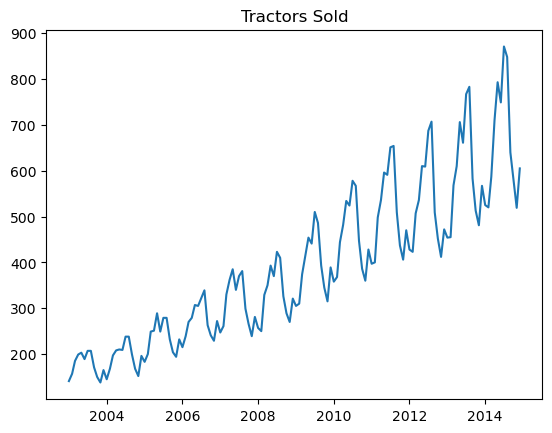

In [77]:
plt.plot(TSales['Number of Tractor Sold'])
plt.title('Tractors Sold')

In [78]:
result = adfuller(TSales, autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')


ADF Statistic: 1.1088250591467343
p-value: 0.9952912415248419
Critical Values:
1%: -3.482087964046026
5%: -2.8842185101614626
10%: -2.578864381347275


In [80]:
sales_diff = TSales.diff().dropna()

In [81]:
sales_diff

,Number of Tractor Sold
Month-Year,
2003-02-01,16.0
2003-03-01,28.0
2003-04-01,14.0
2003-05-01,4.0
2003-06-01,-14.0
...,...
2014-08-01,-23.0
2014-09-01,-208.0
2014-10-01,-59.0


In [82]:
result = adfuller(sales_diff, autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -2.54348077319606
p-value: 0.10525012618272611
Critical Values:
1%: -3.4825006939887997
5%: -2.884397984161377
10%: -2.578960197753906


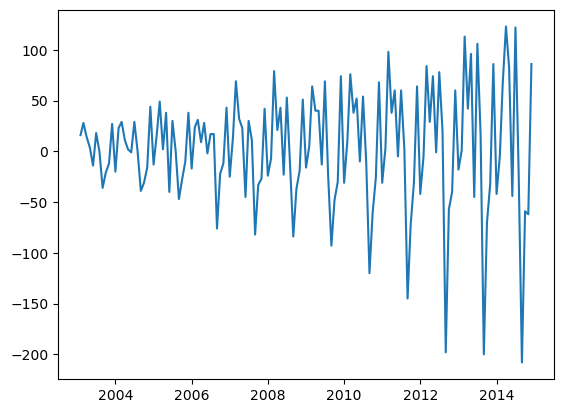

In [83]:
plt.plot(sales_diff['Number of Tractor Sold'])